In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [13]:
train_df = pd.read_csv("/content/drive/MyDrive/Machine Learning Projects/Titantic Survivor Detection/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Machine Learning Projects/Titantic Survivor Detection/test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
def add_title(df):
    titles = []
    for _, row in df.iterrows():
        name = row["Name"]
        title = name.split(",")[1].split(".")[0].strip()
        titles.append(title)
    df["Title"] = pd.Series(titles)
    return df

train_df = add_title(train_df)
test_df = add_title(test_df)

train_df["Title"].unique(), test_df["Title"].unique()

(array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
        'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
        'Jonkheer'], dtype=object),
 array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
       dtype=object))

In [17]:
test_df[test_df["Title"] == "Dona"]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Dona


In [18]:
selector = (test_df["Sex"] == "female") & (test_df["Age"] == 39)
test_df[selector].groupby(["Title", "Age"]).size().reset_index()

,Title,Age,0
0,Dona,39.0,1
1,Miss,39.0,1


In [19]:
train_df[(train_df["Sex"] == "female") & (train_df["Age"] == 39)].groupby(["Title", "Age"]).size().reset_index()

,Title,Age,0
0,Miss,39.0,1
1,Mrs,39.0,5


In [20]:
test_df.loc[test_df['Title'] == 'Dona', 'Title'] = 'Mrs'
test_df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr'],
      dtype=object)

In [21]:
def get_cabin_group(cabin):
    if pd.isna(cabin):
        return "U"  # means undefined or "no cabin"
    return cabin[0]

train_df["CabinGroup"] = train_df["Cabin"].apply(get_cabin_group)
test_df["CabinGroup"] = test_df["Cabin"].apply(get_cabin_group)

# lets drop "Cabin" as we're not gonna use it now

train_df = train_df.drop("Cabin", axis=1)
test_df = test_df.drop("Cabin", axis=1)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,CabinGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,U


In [22]:
train_df[train_df["Title"] == "Master"]["Age"].mean()

4.574166666666667

In [23]:
all_df = pd.concat([train_df, test_df])
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,CabinGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,U
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,U
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,U


In [24]:
def fill_age(df, all_df):
    age = []
    for _, row in df.iterrows():
        if pd.isna(row["Age"]):
            mean_age = all_df[all_df["Title"] == row["Title"]]["Age"].mean()
            age.append(int(mean_age))
        else:
            age.append(int(row["Age"]))
    df["Age"] = pd.Series(age)
    return df

train_df = fill_age(train_df, all_df)
test_df = fill_age(test_df, all_df)

train_df.isna()["Age"].sum(), test_df.isna()["Age"].sum()

(0, 0)

In [25]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
CabinGroup     0
dtype: int64

In [26]:
train_df.loc[train_df["Embarked"].isna(), 'Embarked'] = train_df["Embarked"].mode()[0]
test_df.loc[test_df["Embarked"].isna(), 'Embarked'] = test_df["Embarked"].mode()[0]

train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
CabinGroup     0
dtype: int64

In [27]:
row = test_df[test_df["Fare"].isna()].iloc[0]

# lets set the mean fare of the same Class
test_df.loc[test_df["Fare"].isna(), "Fare"] = all_df[all_df["Pclass"] == row["Pclass"]]["Fare"].mean()

test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
CabinGroup     0
dtype: int64

In [28]:
cabin_map = {data: idx for idx, data in enumerate(train_df["CabinGroup"].unique())}
embarked_map = {data: idx for idx, data in enumerate(train_df["Embarked"].unique())}
sex_map = {data: idx for idx, data in enumerate(train_df["Sex"].unique())}
title_map = {data: idx for idx, data in enumerate(train_df["Title"].unique())}

MAPS = {
    "Sex": sex_map,
    "CabinGroup": cabin_map,
    "Embarked": embarked_map,
    "Title": title_map,
}
MAPS

{'Sex': {'male': 0, 'female': 1},
 'CabinGroup': {'U': 0,
  'C': 1,
  'E': 2,
  'G': 3,
  'D': 4,
  'A': 5,
  'B': 6,
  'F': 7,
  'T': 8},
 'Embarked': {'S': 0, 'C': 1, 'Q': 2},
 'Title': {'Mr': 0,
  'Mrs': 1,
  'Miss': 2,
  'Master': 3,
  'Don': 4,
  'Rev': 5,
  'Dr': 6,
  'Mme': 7,
  'Ms': 8,
  'Major': 9,
  'Lady': 10,
  'Sir': 11,
  'Mlle': 12,
  'Col': 13,
  'Capt': 14,
  'the Countess': 15,
  'Jonkheer': 16}}

In [29]:
FIELDS = [
    "Pclass",
    "Sex",
    "Age",
    "CabinGroup",
    "Title",
    "Embarked",
    "Fare",
    # "SibSp",
    # "Parch",
    "Family", # A new feature, SibSp are number of siblins, Parch are number of parents.
    "TicketLen", # A new feature, just the length of the ticket
    "NameLen", # A new feature, just the length of the Name
]

def to_vector(row):
    res = []

    for field in FIELDS:
        if field in MAPS:
            key = row[field]
            res.append(MAPS[field][key])
        elif field == "Family":
            res.append(row["SibSp"] + row["Parch"])
        elif field == "TicketLen":
            res.append(len(row["Ticket"]))
        elif field == "NameLen":
            res.append(len(row["Name"]))
        else:
            res.append(row[field])
    return res

to_vector(train_df.iloc[0])

[3, 0, 22, 0, 0, 0, 7.25, 1, 9, 23]

In [30]:
from sklearn.model_selection import train_test_split

X = [to_vector(row) for _, row in train_df.iterrows()]
Y = train_df["Survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


def evaluate_with_classifier(clf):
    # clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, Y_train)

    # Predict on the training set
    Y_train_pred = clf.predict(X_train)

    # Predict on the testing set
    Y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
    return test_accuracy


print("Decision Tree Classifier")
evaluate_with_classifier(DecisionTreeClassifier(random_state=42))

Decision Tree Classifier
Training Accuracy: 99.72%
Testing Accuracy: 79.33%


0.7932960893854749

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# List of classifiers to evaluate
classifiers = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier(),
    LogisticRegression(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

# Evaluate each classifier
for clf in classifiers:
    print(f"\n{clf.__class__.__name__}")
    evaluate_with_classifier(clf)


DecisionTreeClassifier
Training Accuracy: 99.72%
Testing Accuracy: 79.33%

RandomForestClassifier
Training Accuracy: 99.72%
Testing Accuracy: 86.03%

SVC
Training Accuracy: 70.93%
Testing Accuracy: 72.63%

KNeighborsClassifier
Training Accuracy: 80.90%
Testing Accuracy: 73.74%

LogisticRegression
Training Accuracy: 80.20%
Testing Accuracy: 82.12%

GradientBoostingClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 91.57%
Testing Accuracy: 84.92%


In [33]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X, Y)

RandomForestClassifier(random_state=42)

Feature ranking:
1. Feature 'Title' (0.1714)
2. Feature 'Fare' (0.1586)
3. Feature 'Age' (0.1467)
4. Feature 'NameLen' (0.1440)
5. Feature 'Sex' (0.1221)
6. Feature 'Pclass' (0.0639)
7. Feature 'Family' (0.0623)
8. Feature 'TicketLen' (0.0586)
9. Feature 'CabinGroup' (0.0475)
10. Feature 'Embarked' (0.0250)


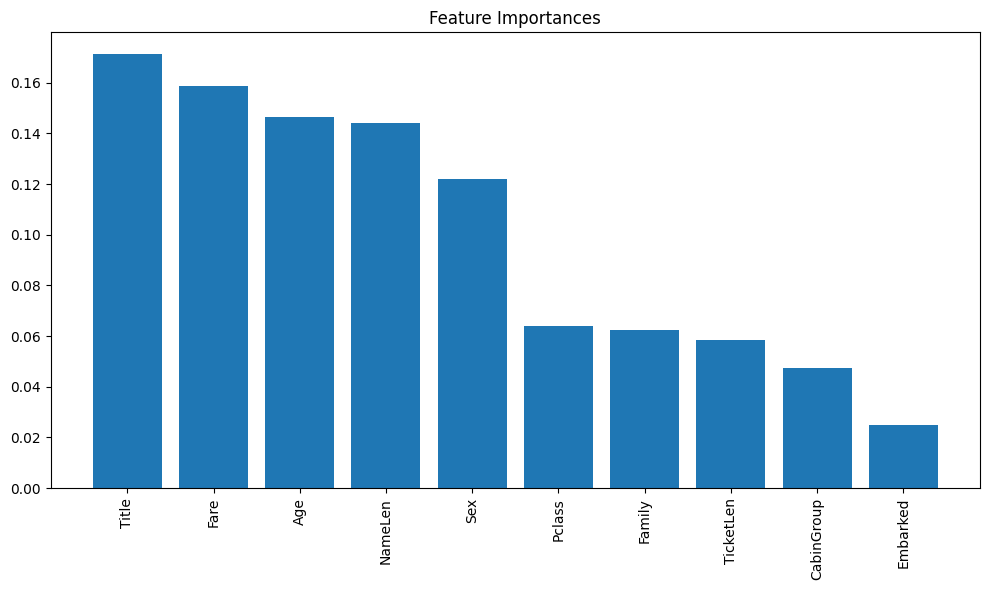

In [34]:
feature_importances = clf.feature_importances_

feature_names = FIELDS

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(len(feature_names)):
    print(f"{f + 1}. Feature '{feature_names[indices[f]]}' ({feature_importances[indices[f]]:.4f})")

# Plot the feature importances (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_names)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=90)
plt.tight_layout()
plt.show()

In [35]:
test_survived = []

Survived_testdf = clf.predict([to_vector(row) for _, row in test_df.iterrows()])

test_df["Survived"] = pd.Series(Survived_testdf)

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,CabinGroup,Survived
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,Mr,U,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,Mrs,U,0
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,Mr,U,0
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,Mr,U,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,Mrs,U,1


In [36]:
test_df[["PassengerId", "Survived"]].to_csv("submission.csv", index=False)